<h1 style="color:skyblue;">Clustering de Imágenes</h1>

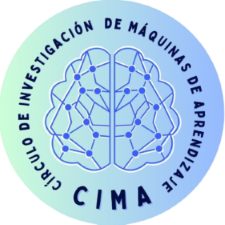

<h4 style="color:skyblue;">Alumna: Lucero Manrique Santos</h4>

El clustering es una técnica de agrupamiento que clasifica automáticamente los datos en grupos o clusters, donde los elementos de un mismo grupo tienen características similares. Cuando hablamos de imágenes, cada píxel se representa como un punto en un espacio, donde cada dimensión corresponde a una banda espectral. Los algoritmos de clustering buscan patrones en este espacio y asignan cada píxel a un grupo específico basándose en sus similitudes espectrales.

El objetivo es segmentar la imagen en por ejemplo, suelos, vegetación, cuerpos de agua, etc. Sin necesidad de entrenamiento previo.

<h2 style="color:skyblue;">Caso 1</h2>
<h4 style="color:skyblue;">Clustering con K-means aplicado a una imagen satelital: Zona Minera La Rinconada, Perú</h4>



La Rinconada, un campo minero, presenta un entorno complejo debido a su actividad minera intensiva y su terreno montañoso. Fecha 5 de mayo 2018 
Fuente: https://www.kaggle.com/datasets/rubysheyla/satellite-images-of-mining-areas-peru

K-means es un algoritmo de clasificación no supervisada que agrupa los datos en K clusters. En el caso de imágenes satelitales, el algoritmo clasifica los píxeles en diferentes grupos según sus valores espectrales, en este caso, valores de diferentes bandas de la imagen.

Se elige K centroides aleatorios, puntos representativos de cada grupo. Cada píxel de la imagen se asigna al centroide más cercano, medido por distancia.
Después de asignar los píxeles, se recalculan los centroides de cada grupo como el promedio de todos los píxeles asignados a ese grupo. Se repiten los pasos 2 y 3 hasta que los centroides ya no cambian, lo que indica que el algoritmo ha convergido.

El algoritmo clasifica la imagen en K grupos espectralmente similares, lo que puede ser útil para identificar diferentes tipos de cobertura del suelo, agua, vegetación, áreas urbanas, etc, en imágenes satelitales.

In [ ]:
#!pip install rasterio

In [3]:
import rasterio
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

<h2 style="color:skyblue;">Zona Minera La Rinconada, Perú</h2> 

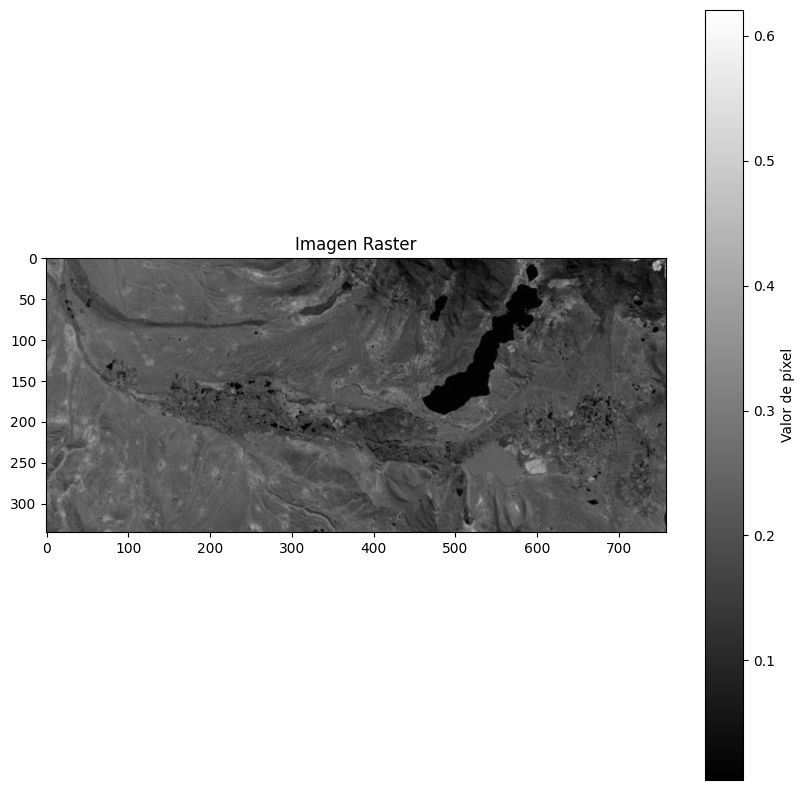

In [29]:
ruta = r"CLIP_RT_LC08_L1TP_002070_20180526_20180605_01_T1_B5.tif"

with rasterio.open(ruta) as imagen:
    imagen_m = imagen.read(1)  
    metadata = imagen.profile

plt.figure(figsize=(10, 10))
plt.imshow(imagen_m, cmap='gray')  
plt.colorbar(label="Valor de píxel")
plt.title("Imagen Raster")
plt.show()


<h4 style="color:skyblue;">Importar y leer la imagen satelital</h4>

In [4]:
ruta= r"CLIP_RT_LC08_L1TP_002070_20180526_20180605_01_T1_B5.tif"
with rasterio.open(ruta) as imagen:
    imagen_m = imagen.read()
    metadata = imagen.profile

Abre una imagen satelital en formato TIFF usando rasterio, lee los datos de sus píxeles en un arreglo NumPy y guarda los metadatos de la imagen en una variable.

<h4 style="color:skyblue;">Preprocesar la imagen para el clustering</h4>


In [5]:
scaler = StandardScaler()
imagen_plana = imagen_m.reshape((imagen_m.shape[0], -1)).T
imagen_escalada = scaler.fit_transform(imagen_plana)

Convierte el arreglo 3D de la imagen en un arreglo 2D con forma. Esto es necesario porque k-means espera los datos en este formato.
Estandarización de datos

In [6]:
kmean = KMeans(n_clusters =4)
kmean

KMeans(n_clusters=4)

Se esta especificando n_clusters=4, lo que significa que deseas agrupar los píxeles en 4 categorías.
El algoritmo selecciona 4 puntos aleatorios como centroides iniciales.

In [7]:
imagen_kmeans = kmean.fit_predict(imagen_escalada)

In [8]:
imagen_kmeans = kmean.fit_predict(imagen_escalada)

In [9]:
imagen_kmeans = imagen_kmeans.reshape((metadata['height'], metadata['width']))

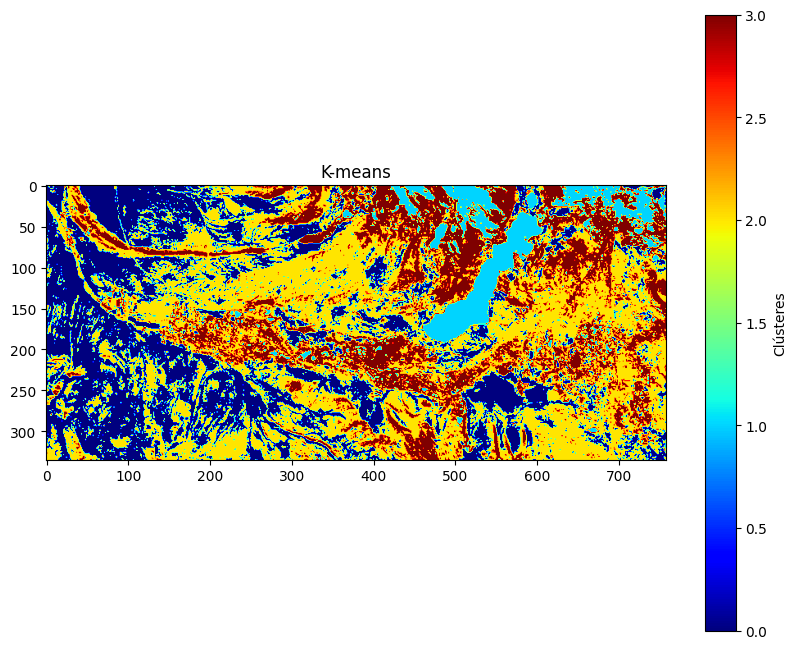

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(imagen_kmeans, cmap='jet')
plt.colorbar(label="Clústeres")
plt.title("K-means")
plt.show()

Celeste - Cuerpos de agua.

Amarillo - Suelo árido o áreas de baja vegetación.

Rojo - Vegetación .

Azul - Zonas rocosas .

<h2 style="color:skyblue;">Caso 2</h2>
<h4 style="color:skyblue;">Clasificación No Supervisada de Imágenes: Un Caso Multiclase</h4>

En este caso se aborda el problema de organizar y analizar un conjunto de imágenes correspondientes a cuatro categorías visuales: aviones, gatos, frutas y motos. El objetivo principal es explorar cómo las características visuales pueden ser utilizadas para agrupar automáticamente las imágenes en categorías significativas.

Para ello, las imágenes se procesan y transforman en representaciones numéricas que capturan sus patrones visuales más relevantes. Luego, se aplican técnicas de agrupamiento no supervisado para identificar similitudes entre las imágenes y organizarlas en grupos representativos.

<h4 style="color:skyblue;">Librerias</h4>

In [12]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, pairwise_distances_argmin


<h4 style="color:skyblue;">Lectura</h4>

In [13]:
# Ruta al directorio con las carpetas de imágenes
data_dir = "natural_images"

# Lista de carpetas (etiquetas)
labels = os.listdir(data_dir)

# Inicializar listas para imágenes y etiquetas
images = []
image_labels = []

<h4 style="color:skyblue;">Carga y Preprocesamiento de Imágenes para Análisis y Agrupamiento</h4>


In [14]:
# Recorrer cada carpeta y leer las imágenes
for label in labels:
    folder_path = os.path.join(data_dir, label)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path).convert('L')  # Convertir a escala de grises
            img = img.resize((160,160))  
            images.append(np.array(img).flatten())  # Convertir a un vector
            image_labels.append(label)  # Etiqueta de la imagen
        except Exception as e:
            print(f"No se pudo cargar la imagen {file_path}: {e}")

# Convertir a arrays de NumPy
X = np.array(images)
y = np.array(image_labels)


Carga imágenes desde carpetas etiquetadas.
Convierte las imágenes en representaciones uniformes y numéricas.
Asocia cada representación con su etiqueta correspondiente.
Prepara los datos para análisis 

<h4 style="color:skyblue;">Codificación de Etiquetas y Visualización de Imágenes por Categoría</h4>

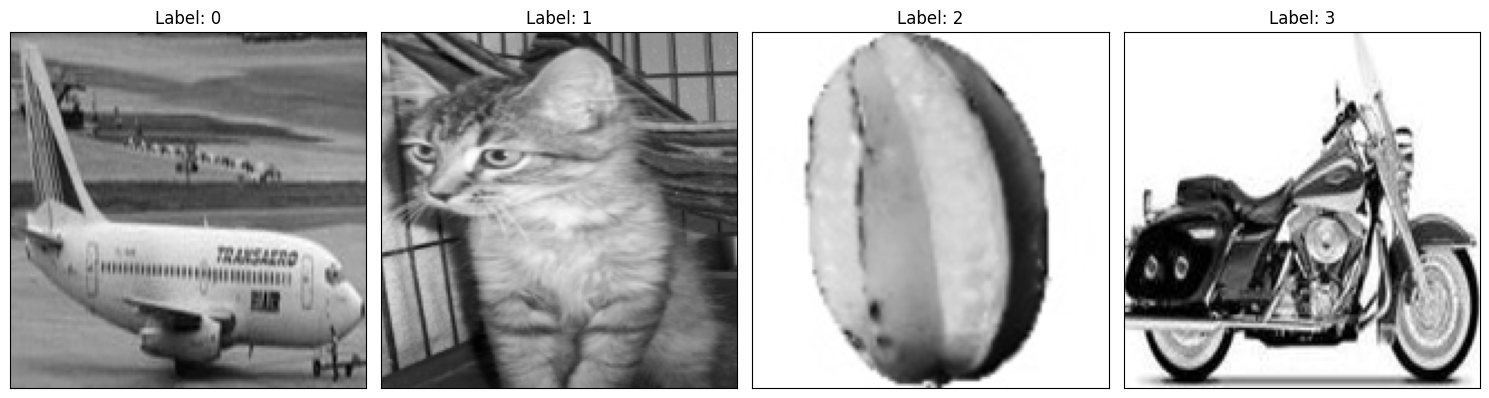

In [15]:

unique_labels = np.unique(y)
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
y = np.array([label_to_int[label] for label in y])


X_images = X.reshape(X.shape[0],160, 160)
# Visualizar ejemplos de cada etiqueta
fig, axes = plt.subplots(1, len(unique_labels), figsize=(15, 5))
for i, label in enumerate(unique_labels):
    # Obtener índices de las imágenes con la etiqueta actual
    digit_i_idx = np.where(y == i)[0]

    # Verificar si hay imágenes para esta etiqueta
    if len(digit_i_idx) > 0:
        # Obtener una imagen de ejemplo para esta etiqueta
        image = X_images[digit_i_idx[0]]

        # Mostrar la imagen
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")

    axes[i].set_yticks([])
    axes[i].set_xticks([])
plt.tight_layout()
plt.show()



Codifica etiquetas de texto como enteros para facilitar el análisis.

Visualización ejemplos representativos de las categorías.


<h4 style="color:skyblue;">Aplicar KMeans </h4>

In [26]:
# Número de clusters 
n_digits = 4
kmeans = KMeans(n_clusters=n_digits, random_state=1234)
cluster_labels = kmeans.fit_predict(X)


<h4 style="color:skyblue;">Métricas de evaluación </h4>

**El Adjusted Mutual Information (AMI)** es una medida que compara la similitud entre dos agrupamientos (o particiones) de un conjunto de datos. En este caso, compara las etiquetas predichas por el modelo (almacenadas en cluster_labels) con las etiquetas reales de las imágenes (almacenadas en y).

**Escala** El valor de AMI varía entre 0 y 1

El **Adjusted Rand Index (ARI)** es otra métrica que mide la similaridad entre dos agrupamientos de datos. Similar al AMI, el ARI compara la asignación de las imágenes en los grupos (clusters) predichos con las etiquetas reales. La diferencia principal es que el ARI tiene en cuenta todas las combinaciones posibles de agrupamientos.

**Escala** El valor de ARI varía entre 0 y 1

In [17]:

ami_score = adjusted_mutual_info_score(cluster_labels, y)
ari_score = adjusted_rand_score(cluster_labels, y)

print(f"AMI Score: {np.round(ami_score * 100, 2)}")
print(f"ARI Score: {np.round(ari_score * 100, 2)}")


AMI Score: 40.91
ARI Score: 29.28


AMI (40.91%) y ARI (29.28%) indican que el modelo ha logrado una cierta correlación con las etiquetas reales, pero aún podría mejorar

<h4 style="color:skyblue;">Visualizar los centros de los clusters </h4>


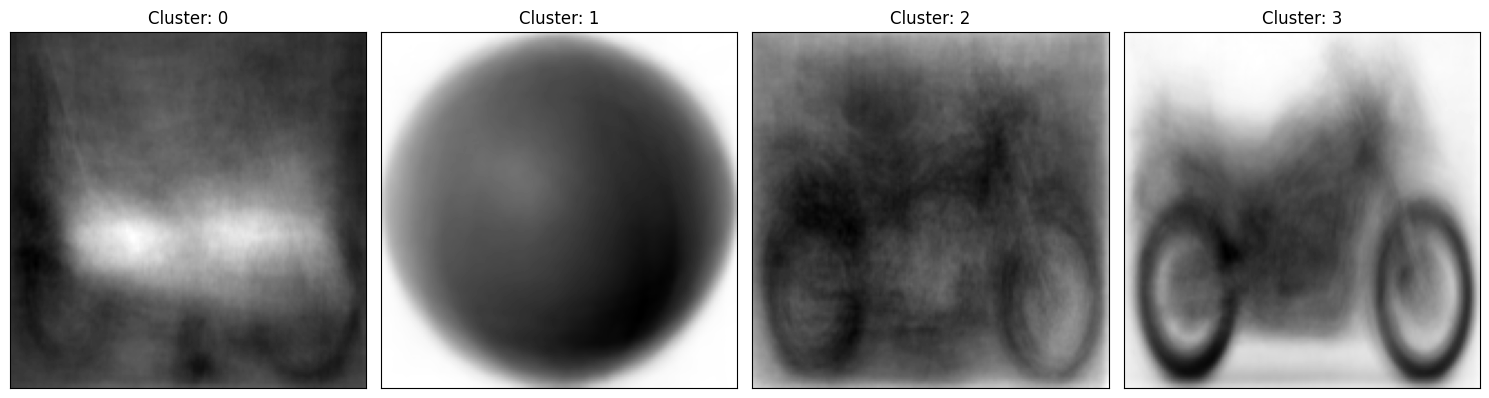

In [18]:

fig, axes = plt.subplots(1, n_digits, figsize=(15, 5))
for c_i in range(n_digits):
    # Obtener el centro del cluster y darle forma
    image = kmeans.cluster_centers_[c_i].reshape(160, 160)
    axes[c_i].imshow(image, cmap='gray')
    axes[c_i].set_title(f"Cluster: {c_i}")
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])
plt.tight_layout()
plt.show()

Muestra las imágenes de los centros de los clusters. Estos centros son una representación promedio de las imágenes agrupadas en cada cluster. 

<h4 style="color:skyblue;">Visualizar las imágenes más cercanas a los centros de los clusters </h4>


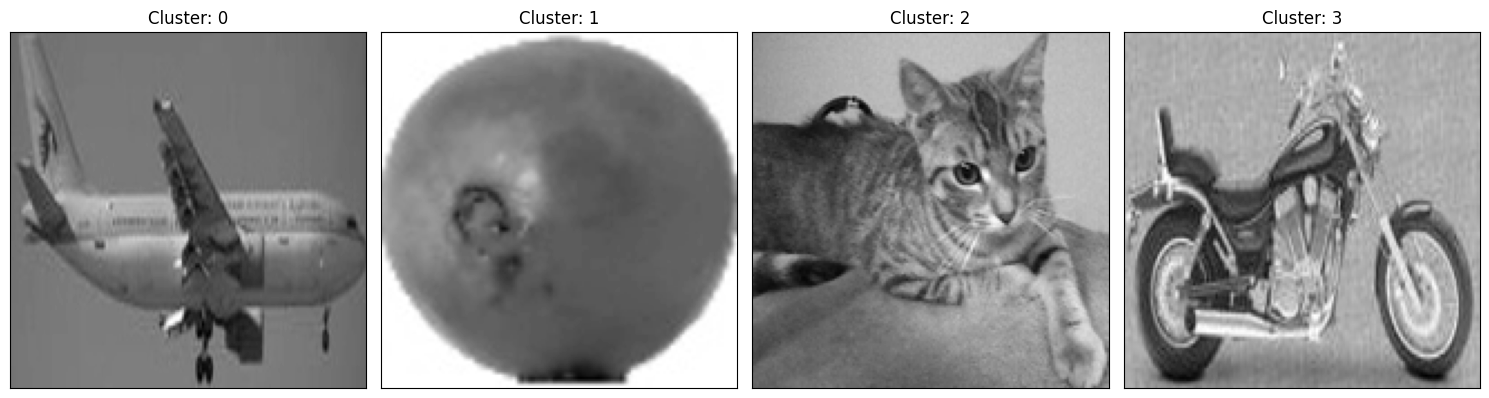

In [19]:

nearest_instances_idx = pairwise_distances_argmin(kmeans.cluster_centers_, X)

fig, axes = plt.subplots(1, n_digits, figsize=(15, 5))
for c_i in range(n_digits):
    # Obtener la imagen más cercana al centro del cluster
    image = X_images[nearest_instances_idx[c_i]]
    axes[c_i].imshow(image, cmap='gray')
    axes[c_i].set_title(f"Cluster: {c_i}")
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])
plt.tight_layout()
plt.show()

Muestra las imágenes más representativas de cada cluster. Estas imágenes son las que están más cerca de los centros de cada cluster en el espacio de características.

<h4 style="color:skyblue;">Otros Métodos </h4>


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


<h4 style="color:skyblue;">Preprocesamiento de Datos y Proyección en 2D con PCA y t-SNE </h4>


In [21]:
# Normalización de los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad con PCA para acelerar t-SNE
pca = PCA(n_components=50)  # Reducir a 50 dimensiones
X_pca = pca.fit_transform(X_scaled)

# Reducción adicional con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

<h4 style="color:skyblue;"> Aplicar DBSCAN </h4>


In [22]:
# Alternativa 1: DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5) 
cluster_labels_dbscan = dbscan.fit_predict(X_tsne)

<h4 style="color:skyblue;"> Aplicar Agglomerative Clustering</h4>

In [23]:
# Alternativa 2: Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(np.unique(y)))
cluster_labels_agg = agg_clustering.fit_predict(X_tsne)


<h4 style="color:skyblue;"> Evaluar las métricas de clustering </h4>

In [24]:
# Para DBSCAN
ami_score_dbscan = adjusted_mutual_info_score(cluster_labels_dbscan, y.astype(int))
ari_score_dbscan = adjusted_rand_score(cluster_labels_dbscan, y.astype(int))

print(f"DBSCAN - Adjusted Mutual Information (AMI) Score: {np.round(ami_score_dbscan * 100, 2)}")
print(f"DBSCAN - Adjusted Rand Index (ARI) Score: {np.round(ari_score_dbscan * 100, 2)}")

# Para Agglomerative Clustering
ami_score_agg = adjusted_mutual_info_score(cluster_labels_agg, y.astype(int))
ari_score_agg = adjusted_rand_score(cluster_labels_agg, y.astype(int))

print(f"Agglomerative - Adjusted Mutual Information (AMI) Score: {np.round(ami_score_agg * 100, 2)}")
print(f"Agglomerative - Adjusted Rand Index (ARI) Score: {np.round(ari_score_agg * 100, 2)}")



DBSCAN - Adjusted Mutual Information (AMI) Score: 48.92
DBSCAN - Adjusted Rand Index (ARI) Score: 24.63
Agglomerative - Adjusted Mutual Information (AMI) Score: 50.43
Agglomerative - Adjusted Rand Index (ARI) Score: 31.22


<h4 style="color:skyblue;"> Visualizar los resultados del clustering </h4>

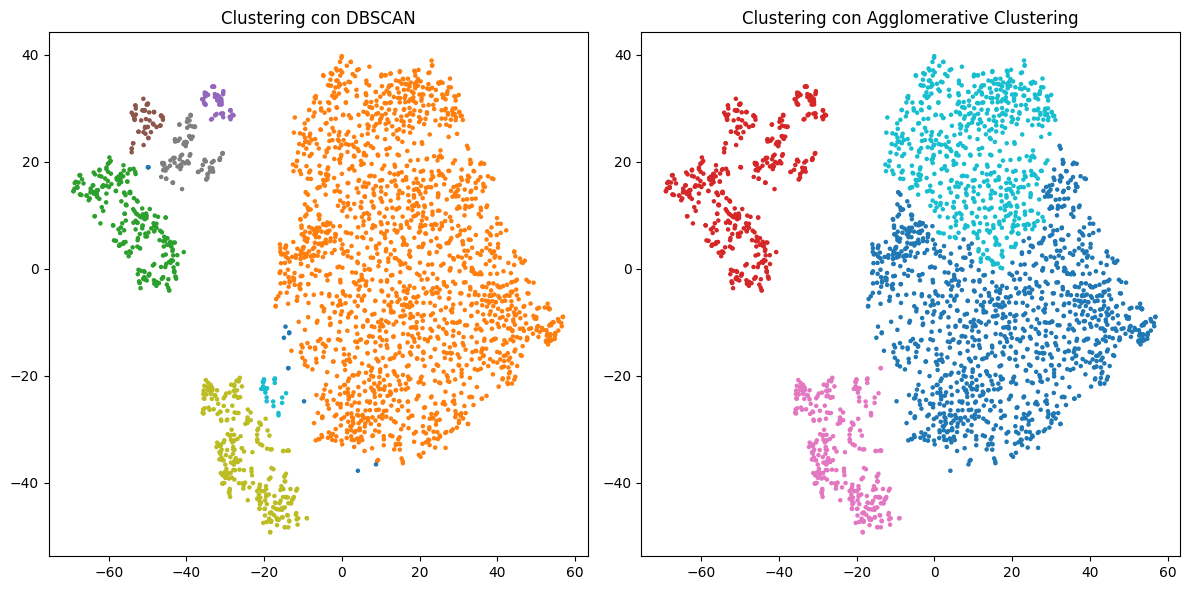

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualización para DBSCAN
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels_dbscan, cmap='tab10', s=5)
axes[0].set_title("Clustering con DBSCAN")

# Visualización para Agglomerative Clustering
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels_agg, cmap='tab10', s=5)
axes[1].set_title("Clustering con Agglomerative Clustering")

plt.tight_layout()
plt.show()